# 1. Loading MNIST Dataset

In [1]:
import os
from PIL import Image
import torch
from torchvision import transforms
from matplotlib import pyplot as plt

In [2]:
root = 'MNIST Training Dataset'
fnames = os.listdir(root)

 **Visualizing 10 images in the training set**

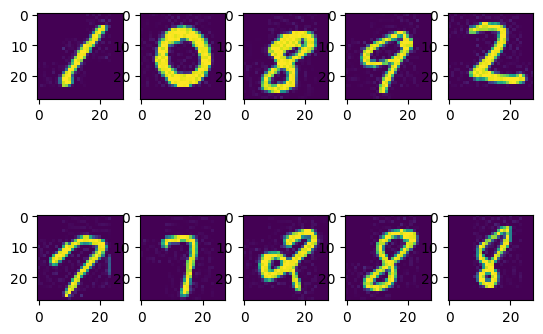

In [8]:
fig,axs = plt.subplots(nrows=2,ncols=5)

for i in range(10):
    filepath = os.path.join(root,fnames[i])
    img = Image.open(filepath)
    axs [i // 5, i % 5].imshow(img)
plt.show()

# 2. Preprocessing data
This task includes the following steps:
* Reshape images into required size
* Convert integer values into float values* Normalize data
* One-hot encodeing labels


In [4]:
# Define the transformation: convert to grayscale, tensor, and normalize
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [5]:
# Preprocess the data
def preprocess_data(X_data, y_data):
    X_data = X_data.unsqueeze(1)  # Add channel dimension
    X_data = X_data.float() / 255.0  # Normalize to range [0, 1]
    y_data = y_data.clone().detach()  # Convert list of labels to a tensor
    y_data = torch.nn.functional.one_hot(y_data, num_classes=1000).float()  # One-hot encode labels
    return X_data, y_data

In [6]:
images = []
labels = []

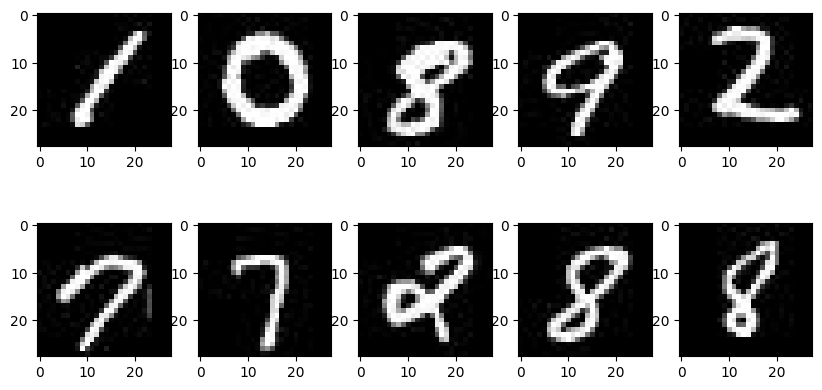

In [9]:
for fname in fnames[:10]:  # Only load the first 10 images
    filepath = os.path.join(root, fname)
    img = Image.open(filepath)
    img = transform(img)
    label = int(fname.split('_')[1].split('.')[0])  # Adjust based on actual filename structure
    images.append(img)
    labels.append(label)
# Convert lists to tensors and preprocess
images_tensor = torch.stack(images)
labels_tensor = torch.tensor(labels)
X_data, y_data = preprocess_data(images_tensor, labels_tensor)
# Visualize the images
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i in range(10):
    axs[i // 5, i % 5].imshow(images[i].squeeze(), cmap='gray')
    #axs[i // 5, i % 5].set_title(f'Label: {labels[i]}') #can include if label name is necessary
    axs[i // 5, i % 5].axis('on')
plt.show()